In [1]:
import os 
import sys
sys.path.append("..")
os.chdir("..")

In [2]:
%%capture
!pip install pandas
!pip install seaborn
!pip install duckdb
!pip install statsmodels
!pip install mlxtend
!pip install scikit-learn
!pip install six

## Before we started
- Due to the large size of the data we will analyze, they are not included in this repository. Instead, we expect you to import the dataset from Dunnhumby at https://www.dunnhumby.com/source-files/. There will be four main tables: dh_transactions, dh_product_lookup, dh_causal_lookup, and dh_store_lookup. Please place these files in the data/*.csv directory. These tables represent household-level transactions over two years, covering four categories: Pasta, Pasta Sauce, Syrup, and Pancake Mix.

## About This Notebook

- This notebook serves as an introduction to data analysis for a food retail store specializing in products like pasta, pasta sauce, pancake mixes, and syrup. However, the story of this store goes beyond just these offerings. Let’s delve deeper and explore further. The goal of this notebook is to answer 7 insightful questions.

- There are two main sections in this notebook
    1. Import data
    2. Insightful Q&A 

- All questions require us to use the following techniques:

    1. SQL
    2. Data Visualization
    3. Time Series Modelling


## Import Data

- Assume you already has 4 table data in data/*, Since this is 
- Suppose we work at a food retail called B Mart as a data scientist. Our goal is too boost sales and product from the following dataset. We have 4 main tables. The metadata of these tables are unknown. Since the author does not provide us the metadata, we can explore, and assume by ourselves.

Here are some unexplanatory features in this dataset

In [3]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt

transaction_df = pd.read_csv("data/dh_transactions.csv")
product_df = pd.read_csv("data/dh_product_lookup.csv")
causal_df = pd.read_csv("data/dh_causal_lookup.csv")
store_df = pd.read_csv("data/dh_store_lookup.csv")

transaction_df_small = transaction_df.sample(100000)

- 'dh_product.csv' : Details of each product 
    - commodity : Category of the product
    - upc : Product ID
    - product_description : Self-Explanatory, However it is not unique by its upc, different product size can have the same description, the product description is started by its brand name 

After checking the commodity value counts, we found out that this mart solely sells Pasta and Bakery related. Since there are only pasta, pasta sauce, syrups, pancake mixes

In [4]:
product_df

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ
...,...,...,...,...,...
922,9999985217,PRIVATE LABEL ALPHABETS,pasta,Private Label,16 OZ
923,9999985260,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32 OZ
924,9999985261,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,2 LB
925,9999985488,PRIVATE LABEL ITAL NESTED ANGEL HAIR,pasta,Private Label Premium,16 OZ


<Axes: ylabel='commodity'>

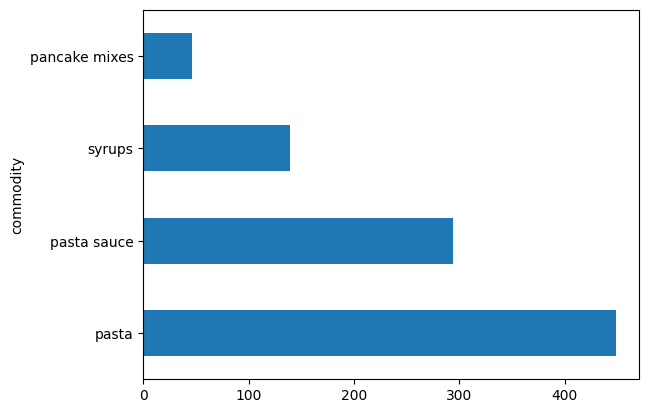

In [5]:
product_df.commodity.value_counts().plot.barh()

Seems like arrangement of each product is changed over week for each store 

- 'dh_causal.csv' : How product was placed at specific week

    - if feature_desc is 'Not on Feature', then display_desc cannot be 'Not on Display', this apply wells in contrast
    - feature_desc : If the product is in promotion, it will not be Not on Feature. Also indicate that how does this product is in promotion, they might be promoted via prochure or at the display in store
    
    - display_desc : If the product is not in promoted, then it will normally be placed on the store common layout
    
This is useful since the arrangement of product is matter

feature_desc:

1. Wrap Interior Feature: Refers to products featured prominently within the interior section of the store, usually wrapped around a particular theme or event.
2. Wrap Back Feature: Similar to the "Wrap Interior Feature," but these products are featured towards the back of the store.
3. Interior Page Feature: Products highlighted on interior pages of promotional materials, such as flyers or catalogs.
4. Not on Feature: Indicates that the product is not part of any particular feature or promotion.
5. Interior Page Line Item: Products listed individually on interior pages of promotional materials, separate from featured sections.
6. Wrap Front Feature: Products featured prominently near the front of the store.
7. Front Page Feature: Products highlighted on the front page of promotional materials.
8. Back Page Feature: Products highlighted on the back page of promotional materials.

display_desc:

1. Not on Display: Indicates that the product is not currently on display in the store.
2. Rear End Cap: Display location at the end of an aisle, typically towards the back of the store.
3. Store Rear: Products displayed towards the rear section of the store.
4. Front End Cap: Display location at the end of an aisle, typically towards the front of the store.
5. In-Shelf: Products displayed within the shelving units.
6. Store Front: Products displayed near the front entrance or front section of the store.
7. Secondary Location Display: Products displayed in a secondary location within the store.
8. In-Aisle: Products displayed within the main aisles of the store.
9. Promo/Seasonal Aisle: Products displayed in a dedicated aisle for promotional or seasonal items.
10. Side-Aisle End Cap: Display location at the end of an aisle, positioned on the side.
11. Mid-Aisle End Cap: Display location at the end of an aisle, positioned in the middle of the aisle.


In [6]:
causal_df

,upc,store,week,feature_desc,display_desc,geography
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1
1,5100001212,1,66,Wrap Back Feature,Not on Display,1
2,5100002792,1,72,Interior Page Feature,Not on Display,1
3,3620000300,1,55,Wrap Interior Feature,Not on Display,1
4,4112907742,1,68,Wrap Interior Feature,Not on Display,1
...,...,...,...,...,...,...
351367,9999966721,387,101,Wrap Front Feature,Not on Display,1
351368,9999966720,387,101,Wrap Front Feature,Not on Display,1
351369,3620000507,387,104,Interior Page Feature,Not on Display,1
351370,3620000493,387,104,Interior Page Feature,Not on Display,1


In [7]:
causal_df.query("geography == 2")
not_on_feature_df = causal_df.query("feature_desc == 'Not on Feature'")
not_on_display_df = causal_df.query("display_desc == 'Not on Display'")

# Verify if 'Not on display' feature cannot be 'Not on feature'
display(not_on_display_df.query("display_desc == 'Not on Feature'"))
display(not_on_feature_df.query("display_desc == 'Not on Display'"))

,upc,store,week,feature_desc,display_desc,geography


,upc,store,week,feature_desc,display_desc,geography


<Axes: ylabel='feature_desc'>

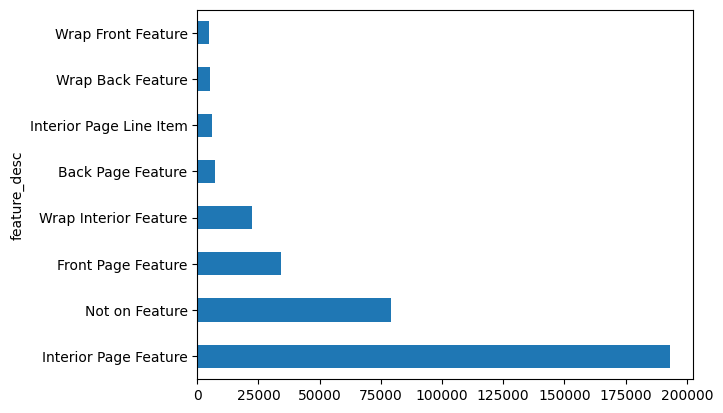

In [8]:
causal_df.feature_desc.value_counts().plot.barh()

<Axes: ylabel='display_desc'>

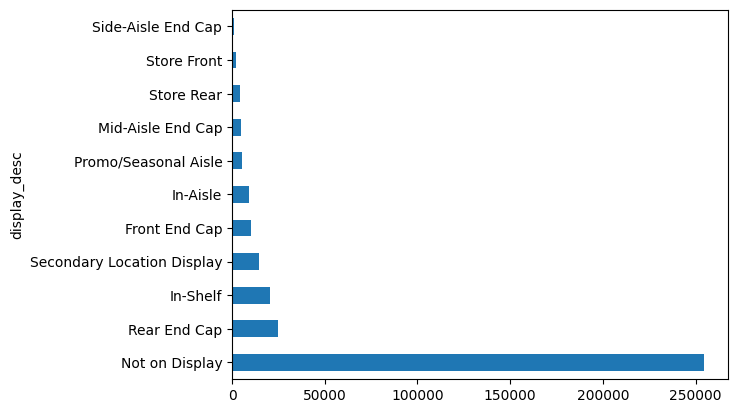

In [9]:
causal_df.display_desc.value_counts().plot.barh()

## Feature Engineering
- Some columns are not existed in these dataframe, but often used

In [10]:
# Here's what we do
transaction_df["price_per_unit"] = transaction_df["dollar_sales"] * transaction_df["units"]
product_df["brand"] = product_df["product_description"].str.split(" ").str[0]
product_df["product_name"] = product_df["product_description"] + " " + product_df["product_size"] 

In [11]:
# Not completely true, we may need to find a better rule, but for now, let's stick with this 
dict(product_df.brand.value_counts())

{'PRIVATE': 123,
 'BARILLA': 53,
 'RAGU': 38,
 'PREGO': 38,
 'RONZONI': 33,
 'SAN': 28,
 'MUELLER': 25,
 'CREAMETTE': 23,
 'DA': 21,
 'DECECCO': 16,
 'COLAVITA': 14,
 'KARO': 14,
 'CLASSICO': 13,
 'LOG': 12,
 'DAVINCI': 12,
 'BERTOLLI': 11,
 'AL': 11,
 'RAOS': 11,
 'H': 10,
 'DEL': 10,
 'PATSY': 9,
 'MRS': 8,
 'CLSCO': 8,
 'M': 8,
 'ELENAS': 7,
 'PASTA': 7,
 'DELL': 7,
 'NO': 7,
 'CRMET': 7,
 'PILL': 6,
 'DE': 6,
 'FERRARA': 6,
 'BOVES': 6,
 'ALESSI': 6,
 'MUELLERS': 5,
 'AUNT': 5,
 'R&F': 5,
 'NEWMANS': 5,
 'EMERILS': 4,
 'CARB': 4,
 'DREAMFIELD': 4,
 'HODGSON': 4,
 'LUCINI': 4,
 'MOTHERS': 4,
 'BUITONI': 4,
 'NRTHWDS': 4,
 'PENNANT': 4,
 'PATSYS': 4,
 'DAVES': 4,
 'LIGHT': 4,
 'ANNARINO': 4,
 'HUNTS': 3,
 'SMUCKER': 3,
 'HEALTHY': 3,
 'LGT': 3,
 'BOB': 3,
 'DARIELLE': 3,
 'KRUSTEAZ': 3,
 'PROGRESSO': 3,
 'CARY': 3,
 'A': 3,
 'FASTSHAKE': 3,
 'HUNT': 3,
 'NEWMN': 3,
 'ROSELLI': 3,
 'MICHELES': 3,
 'WACKY': 2,
 'PINE': 2,
 'HNGRY': 2,
 'P': 2,
 'PIONEER': 2,
 'CNDO': 2,
 'MLINOTST': 2,

### Question 1

🤔 Q : What is the top best and worst sold products according to unit sales
 
💡 A : Let's start exploring

In [12]:
# To answer this question, we need to get the product name in each transaction 
import duckdb

result = duckdb.query("""
    SELECT transaction_df.upc, transaction_df.units, product_df.product_name 
    FROM transaction_df 
    INNER JOIN product_df 
    ON transaction_df.upc = product_df.upc
""").df()

result

,upc,units,product_name
0,5100008725,1,PREGO X CKY GARDEN COMBO 48 OZ
1,5100012909,1,PREGO RED PEPPER/GRLIC 26 OZ
2,4112907742,1,CLASSICO SPICY RED PEPPER 26 OZ
3,9999985061,1,PRIVATE LABEL ELBOW MACARONI 48 OZ
4,9999985133,2,PRIVATE LABEL SPAGHETTI 8 OZ
...,...,...,...
5197676,7680828098,1,BARILLA ROTINI 16 OZ
5197677,7680828098,1,BARILLA ROTINI 16 OZ
5197678,7680828098,1,BARILLA ROTINI 16 OZ
5197679,7680828098,1,BARILLA ROTINI 16 OZ


In [13]:
def get_top_k_sale_df(transaction_df:pd.DataFrame=transaction_df, 
                      k:int=20,
                      plot:bool=True,
                      product_df:pd.DataFrame=product_df,
                      top_best:bool=True
                     )->pd.DataFrame:
    
    # Query the used dataframe
    result_df = duckdb.query("""
        SELECT transaction_df.upc, transaction_df.units, product_df.product_name 
        FROM transaction_df 
        INNER JOIN product_df 
        ON transaction_df.upc = product_df.upc
    """).df()
    
    
    top_sale_df = result_df.groupby("product_name").\
                            aggregate(unit_sales=("units","sum")).\
                            sort_values("unit_sales",ascending=not top_best)[:20]
    if plot:
        top_sale_df.plot.barh()
        plt.show()
    
    return top_sale_df

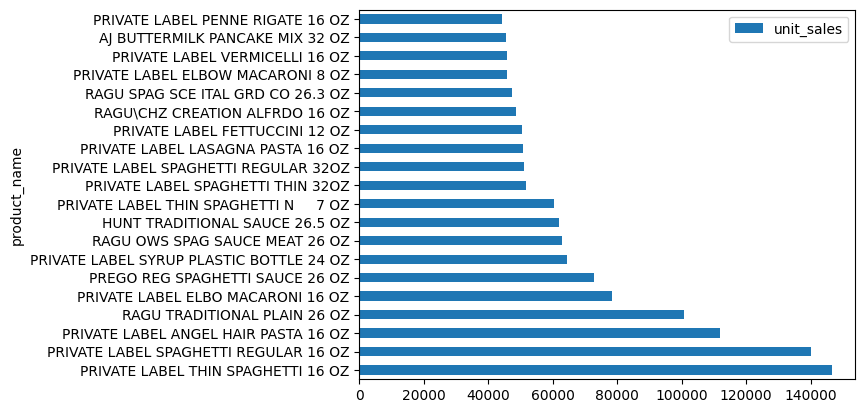

In [14]:
top_sale_df = get_top_k_sale_df(transaction_df)

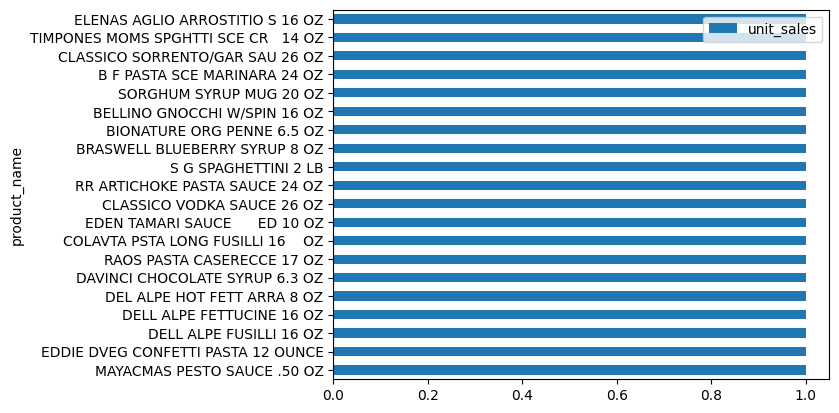

In [15]:
worst_sale_df = get_top_k_sale_df(transaction_df,top_best=False)

### Question 2

🤔 Q : What are the overall sales across each shop over time for any specific product?

💡 A : Since the question doesn't specify a particular product, we’ll provide a function that takes the UPC of any product and returns a representative chart of its sales over time across each shop. With a demonstration of  Bertolli Tom&Basil Sauce 24OZ and Private Label Thin Spaghetti 16 OZ

In [16]:
# Let's review our product table first
display(product_df)

,upc,product_description,commodity,brand,product_size,product_name
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,VINCENT,25 OZ,VINCENT S ORIG MARINARA S 25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,PINE,40 OZ,PINE MOUNTAIN SYRUP 40 OZ
2,566300028,MILLER CANE SYRUP,syrups,MILLER,19 OZ,MILLER CANE SYRUP 19 OZ
3,566300029,MILLER CANE SYRUP,syrups,MILLER,12 OZ,MILLER CANE SYRUP 12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,PINE,19 OZ,PINE MOUNTAIN SYRUP 19 OZ
...,...,...,...,...,...,...
922,9999985217,PRIVATE LABEL ALPHABETS,pasta,PRIVATE,16 OZ,PRIVATE LABEL ALPHABETS 16 OZ
923,9999985260,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,PRIVATE,32 OZ,PRIVATE LABEL COMPLETE PANCAKE MIX 32 OZ
924,9999985261,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,PRIVATE,2 LB,PRIVATE LABEL COMPLETE PANCAKE MIX 2 LB
925,9999985488,PRIVATE LABEL ITAL NESTED ANGEL HAIR,pasta,PRIVATE,16 OZ,PRIVATE LABEL ITAL NESTED ANGEL HAIR 16 OZ


In [17]:
# Make the viz where show the sales count of the given upc
def get_sale_month_store_data(upc:int,
                   transaction_df:pd.DataFrame=transaction_df,
                   product_df:pd.DataFrame=product_df,
                   plot:bool=True,
                  )->pd.DataFrame:
    product_desc = product_df.query(f"upc == {upc}").product_description.values[0]
    product_size = product_df.query(f"upc == {upc}").product_size.values[0]
    product_name = product_desc + " " + product_size
    interested_product_df = transaction_df.query(f"upc == {upc}")
    interested_week_store_df = interested_product_df.groupby(["week","store"]).aggregate(sum=("units", "sum")).reset_index()
    
    # Handle missing stores for each week by the following
    all_weeks = interested_product_df['week'].unique()
    all_stores = interested_product_df['store'].unique()
    
    # Create the initial combination of all week and store
    all_combinations = pd.DataFrame([(week, store, 0) for week in all_weeks for store in all_stores], 
                                    columns=['week', 'store', 'sum'])
    
    all_combinations.sort_values(["week","store"], inplace=True)
    
    # Merge the existing DataFrame with all possible combinations and fill missing counts with 0
    sales_df = pd.merge(all_combinations, interested_week_store_df, on=['week', 'store'], how='left').fillna(0)
    
    sales_df["sum"] = sales_df["sum_x"] + sales_df["sum_y"]
    sales_df["sum"] = sales_df["sum"].astype(int)
    sales_df.drop(["sum_x","sum_y"],axis=1,inplace=True)
    
    sales_df["month"] = sales_df["week"] // 4
    sales_df.drop(["week"],axis=1,inplace=True)
    sales_df = sales_df.groupby(["month","store"]).aggregate(sum=("sum", "sum")).reset_index()
    
    if plot:
        pivot_sale_df = sales_df.pivot(index="month", columns="store", values="sum")
        plt.figure(figsize=(10, 6))
        sns.heatmap(pivot_sale_df, annot=False, fmt="d", cmap="YlGnBu")
        plt.title(f"{product_name} Sales Count of Products by Month and Store")
        plt.xlabel("Store")
        plt.ylabel("Month")
        plt.show()
        
    return sales_df


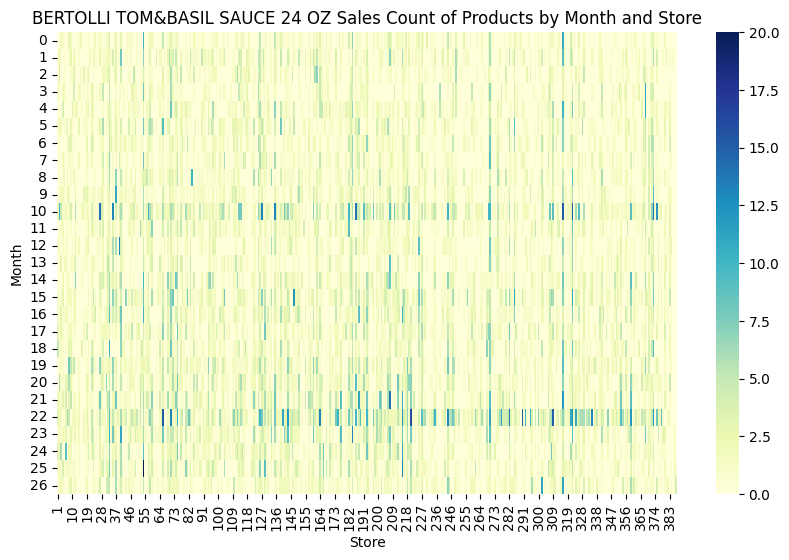

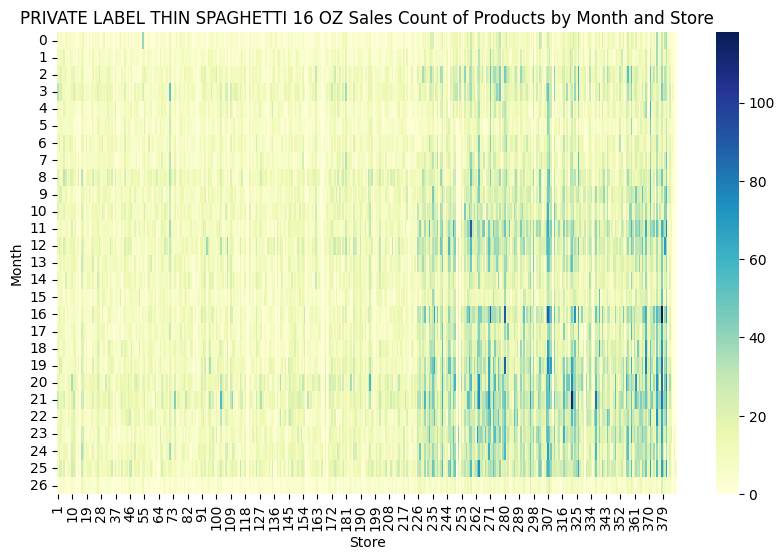

In [18]:
upc = 3620000470
sales_df = get_sale_month_store_data(upc=upc,plot=True)

upc = 9999985020
sales_df = get_sale_month_store_data(upc=upc,plot=True)

- You can see that not all product have high peak on some store, sometime it really depends on Month-
- See BERTOULLI TOM BASIL 24 OZ. Most of the sells from at month 10, 22
- See Private Label Thin Spaghetti 16 OZ. Most of the sells is after store 226 to 379

### Question 3

🤔 Q : What percentage of people who buy Pasta Sauce also purchase Product X or Brand Z?
 
💡 A : Technically, this question expects us to create a function which take upd as input. `get_num_people(upd:int)->int`

<u>Step 1</u> : In order to do that, we need to identify which basket contain pasta sauce, and Product X in the same basket

In [19]:
# Get the customer who have a history of being pasta sauce buyer
basket_df = duckdb.query("""
                        SELECT transaction_df.basket, transaction_df.household, transaction_df.upc, product_df.product_name, product_df.brand, product_df.commodity     
                        FROM transaction_df 
                        INNER JOIN product_df 
                        ON transaction_df.upc = product_df.upc
                        ORDER BY basket
                        """).df()

basket_df

,basket,household,upc,product_name,brand,commodity
0,1,125434,3620000470,BERTOLLI TOM&BASIL SAUCE 24 OZ,BERTOLLI,pasta sauce
1,1,125434,7680850106,BARILLA ANGEL HAIR 16 OZ,BARILLA,pasta
2,2,108320,1800028064,H J PANCK BTRMLK COMP MIX,H,pancake mixes
3,3,162016,9999985067,PRIVATE LABEL VERMICELLI 16 OZ,PRIVATE,pasta
4,4,89437,9999985131,PRIVATE LABEL IMPORTED LASAGNA 16 OZ,PRIVATE,pasta
...,...,...,...,...,...,...
5197676,3316346,435465,9999985001,PRIVATE LABEL THIN SPAGHETTI N 7 OZ,PRIVATE,pasta
5197677,3316346,435465,9999966720,PRIVATE LABEL SPAGHTTI SAUCE MEAT 26 OZ,PRIVATE,pasta sauce
5197678,3316347,352690,9999985027,PRIVATE LABEL LASAGNA PASTA 16 OZ,PRIVATE,pasta
5197679,3316348,55530,3620000300,RAGU OWS SPAG SAUCE MEAT 26 OZ,RAGU,pasta sauce


In [20]:
# Check which bucket contains pasta sauce or not
pasta_sauce_basket_df = basket_df.query("commodity == 'pasta sauce'")
pasta_sauce_basket_id = pasta_sauce_basket_df.basket.unique()
pasta_sauce_basket_df = basket_df.query("basket in @pasta_sauce_basket_id")

In [21]:
n_pasta_sauce_bucket = len(pasta_sauce_basket_df)
n_pasta_sauce_buyer = len(pasta_sauce_basket_df.household.unique())

print(f"{n_pasta_sauce_bucket = }")
print(f"{n_pasta_sauce_buyer = }")

n_pasta_sauce_bucket = 3049380
n_pasta_sauce_buyer = 362305


In [22]:
# Now filtering out pasta sauce item
rm_basket_with_pasta_sauce_df = pasta_sauce_basket_df.query("commodity != 'pasta sauce'")

# This contains  
rm_basket_with_pasta_sauce_df

,basket,household,upc,product_name,brand,commodity
1,1,125434,7680850106,BARILLA ANGEL HAIR 16 OZ,BARILLA,pasta
4,4,89437,9999985131,PRIVATE LABEL IMPORTED LASAGNA 16 OZ,PRIVATE,pasta
10,8,8283,3000005620,QUAKER AUNT JAM BUTR LITE 24 OZ,QUAKER,syrups
11,8,8283,3340060177,SAN GIORGI TRIO ITALIANO 16 OZ,SAN,pasta
14,9,125537,9999985001,PRIVATE LABEL THIN SPAGHETTI N 7 OZ,PRIVATE,pasta
...,...,...,...,...,...,...
5197641,3316320,174208,9999985020,PRIVATE LABEL THIN SPAGHETTI 16 OZ,PRIVATE,pasta
5197666,3316339,507555,9999985053,PRIVATE LABEL CONCHIGLIE RIGATE SHL 16 OZ,PRIVATE,pasta
5197668,3316340,429812,7151800024,HODG MILL WHO WHT SPIRALS NO TAG,HODG,pasta
5197669,3316341,209850,9999985001,PRIVATE LABEL THIN SPAGHETTI N 7 OZ,PRIVATE,pasta


In [23]:
from typing import Union
def get_n_customer_from_product_name(x:Union[int,str], 
                                    rm_basket_with_pasta_sauce_df:pd.DataFrame = rm_basket_with_pasta_sauce_df,
                                    percentage=True)->Union[int,float]:
    """
    Return a number of customer which also bought product upd 
    
    arg : 
    x - upd or product_name
    percentage - Return output as percentage or not
    """
    global n_pasta_sauce_buyer
    
    query = f"upc == {x}" if isinstance(x, int) else f"product_name == '{x}'"
    result_df = rm_basket_with_pasta_sauce_df.query(query)

    n_customer = len(result_df.household.unique())
    output = n_customer/n_pasta_sauce_buyer if percentage else n_customer
        
    return output

def get_n_customer_from_brand(brand_name:str, 
                              rm_basket_with_pasta_sauce_df:pd.DataFrame = rm_basket_with_pasta_sauce_df,
                              percentage=True)->Union[int,float]:
    
    """
    Return a number of customer which also bought product with brand brand_name
    """
    
    global n_pasta_sauce_buyer
    
    result_df = rm_basket_with_pasta_sauce_df.query(f"brand == '{brand_name}'")
    n_customer =len(result_df.household.unique())
    output = n_customer/n_pasta_sauce_buyer if percentage else n_customer
        
    return output

Demonstration : Here's an example of usage, How many people buy Product `X` along with `Pasta Sauce`?

In [24]:
x = "PRIVATE LABEL THIN SPAGHETTI 16 OZ"

n = get_n_customer_from_product_name(x,percentage=False)
print(f"There are {n} customers who also bought {x} along with a pasta sauce in the same basket")

There are 42369 customers who also bought PRIVATE LABEL THIN SPAGHETTI 16 OZ along with a pasta sauce in the same basket


- Demonstration : Here's an example of usage, What percentage of Pasta Sauce buyers also purchase Product `X` or `Brand Z`

In [25]:
z = "PRIVATE"

n = get_n_customer_from_brand(z,percentage=True)
print(f"There are {n*100:.2f}% out of all pasta sauce buyers who also bought brand {z}")

There are 53.02% out of all pasta sauce buyers who also bought brand PRIVATE


---

### Question 4

🤔 Q : In complementary categories like Pasta and Pasta Sauce, what products are frequently bought together?

💡 A : Another great question. One of the effective Promotion is to recommend the product that customer also bought. This can boost sales unexpectedly, Before Discussing how, we can prepare dataset 

In [61]:
from typing import Set, List

def get_unique_product_per_basket(transaction_df)->List[Set[str]]:
    """
    Obtain a list of unique item(s) per each basket 
    """
    basket_df = duckdb.query("""
                        SELECT transaction_df.basket, transaction_df.upc, product_df.product_description  
                        FROM transaction_df 
                        INNER JOIN product_df 
                        ON transaction_df.upc = product_df.upc
                        ORDER BY basket
                        """).df()
    
    unique_products = basket_df.groupby('basket')['product_description'].agg(lambda x: set(x.unique()))
    return unique_products.tolist()

- ⚠️ This may takes a long time, we will find a better way to improve the computational speed

In [62]:
# This may takes a long time
unique_products = get_unique_product_per_basket(transaction_df)

print(f"Number of baskets : {len(unique_products)}")
print(f"First 10 Baskets : {unique_products[:10]}")


KeyboardInterrupt



In [ ]:
from collections import Counter
from itertools import combinations

# Create a list of all pairs of products purchased together
pairs = []
tri_pairs = []

for unique_product in unique_products:
    # In case, you want to split into a pair of products 
    pairs.extend(combinations(unique_product, 2))
    tri_pairs.extend(combinations(unique_product, 3))

# Count occurrences of each pair
pair_counts = Counter(pairs)
tri_pair_counts = Counter(tri_pairs)

In [ ]:
# Make a dataframe

# Create lists to hold item pairs and their counts
items = []
counts = []

# Separate the keys and values from the dictionary
for item_pair, count in dict(pair_counts).items():
    items.append(item_pair)
    counts.append(count)

# Create DataFrame
pair_df = pd.DataFrame({'Item Pair': items, 'Count': counts})

# Split item pair into two separate columns
pair_df[['Item 1', 'Item 2']] = pd.DataFrame(pair_df['Item Pair'].tolist(), index=pair_df.index)

# Drop the original 'Item Pair' column
pair_df.drop(columns=['Item Pair'], inplace=True)
pair_df.sort_values("Count",ascending=False,inplace=True)

In [ ]:
pair_df

In [ ]:
# Create lists to hold item pairs and their counts
items = []
counts = []

# Separate the keys and values from the dictionary
for item_pair, count in dict(tri_pair_counts).items():
    items.append(item_pair)
    counts.append(count)

# Create DataFrame
tri_pair_df = pd.DataFrame({'Item Pair': items, 'Count': counts})

# Split item pair into two separate columns
tri_pair_df[['Item 1', 'Item 2', 'Item 3']] = pd.DataFrame(tri_pair_df['Item Pair'].tolist(), index=tri_pair_df.index)

# Drop the original 'Item Pair' column
tri_pair_df.drop(columns=['Item Pair'], inplace=True)
tri_pair_df.sort_values("Count",ascending=False,inplace=True)

- Here's the top 10 products are commonly purchased together (As a pair [2 products together])

In [ ]:
pair_df.head(10)

- Here's the top 10 products are commonly purchased together (As a pair [3 products together])

In [ ]:
tri_pair_df.head(10)

---

### Question 5

🤔 Q : What is the average dollar amount spent on Pasta Sauce per household?

💡 A: Here's the following steps to obtain the average dollar sales

Step 1: Filtering the product which belongs to pasta category

In [63]:
from typing import List

# Filtering the product which belongs to pasta category
pasta_sauce_upc:List[int] = product_df.query("commodity == 'pasta sauce'")["upc"].to_list()
    
pasta_sauce_mask = transaction_df['upc'].isin(pasta_sauce_upc)
pasta_sauce_transaction_df = transaction_df[pasta_sauce_mask]

In [65]:
print(f"The total sold pasta sauce : {len(pasta_sauce_transaction_df)}")

The total sold pasta sauce : 1913522


Step 2 : Now, group the total dollar sales made by each household

In [66]:
# Validate the correctness
pasta_sauce_transaction_df.query("units > 1").head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,total_sale,price_per_unit
48,3620000300,6.57,3,1739,2,1,107911,365,25,1,0,19.71,19.71
61,9999971297,3.00,2,855,2,1,58628,253,32,1,0,6.00,6.00
65,9999981584,4.95,5,1238,2,1,126816,253,35,1,0,24.75,24.75
70,9999971306,3.00,2,2037,2,1,151460,253,40,1,0,6.00,6.00
73,9999973093,3.00,2,1120,2,1,88134,352,42,1,0,6.00,6.00


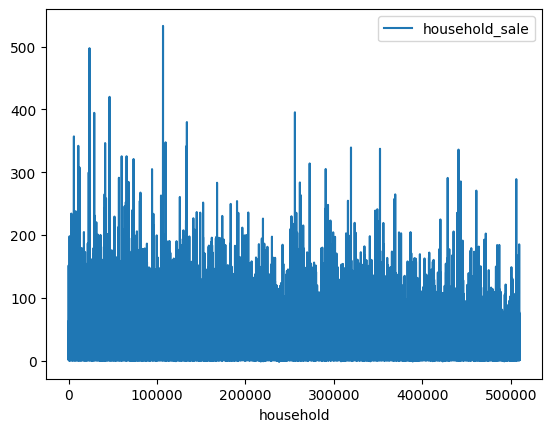

Average Dollar sales of Pasta Sauce per household is 11.109497467603262


In [67]:
pasta_sauce_sale_per_household_df = pasta_sauce_transaction_df.groupby("household").aggregate(household_sale=("dollar_sales","sum"))
pasta_sauce_sale_per_household_df.plot()
plt.show()

answer = pasta_sauce_sale_per_household_df["household_sale"].mean()
print(f"Average Dollar sales of Pasta Sauce per household is {answer}")

---

### Question 6

🤔 Q : Did any customers use a coupon for their first purchase of a particular item or category? If so, how many of these customers went on to make additional purchases of the same item or category?

💡 A : This is a nice question. With this, we can test the effectiveness of the campaign, if a coupon really attracts the potential customer. Is the product they bought actually make them satisfied, so that they come to buy again 

Step 1 : Since the same product always have the same commodity, so, we look at same commodity instead

In [26]:
# We need the bucket which apply their coupon

result_df = duckdb.query("""
                        SELECT transaction_df.upc, transaction_df.day, transaction_df.basket, transaction_df.household, transaction_df.coupon, product_df.commodity 
                        FROM transaction_df 
                        INNER JOIN product_df 
                        ON transaction_df.upc = product_df.upc
                        ORDER BY household, basket
                        """).df()

coupon_result_df = result_df.query("coupon == 1")

In [40]:
coupon_result_df = result_df.query("coupon == 1")

ever_used_coupon_household = list(coupon_result_df.household.unique())
print(f"The customer who ever used coupon : {len(ever_used_coupon_household)}")

The customer who ever used coupon : 42028


- 💡Since there are only 42028 customers who used coupons, This means the answer for this question should not be larger than 42028.

- Let's subsample the dataframe with these customers only to save processing time 

In [49]:
# Scaled down dataframe
result_df = result_df.query("household in @ever_used_coupon_household")

print(f"{len(result_df) = }")

len(result_df) = 1087116


In [59]:
first_basket_per_household_commodity = coupon_result_df.groupby(
    ['household', 'commodity']
).aggregate(first_coupon_day=("day","min"))

first_basket_per_household_commodity.reset_index(inplace=True)

# ['basket'].min().reset_index()
# first_basket_per_household_commodity

In [60]:
first_basket_per_household_commodity.pivot(index="household",columns="commodity",values="first_coupon_day")

commodity,pancake mixes,pasta,pasta sauce,syrups
household,,,,
2,NaN,NaN,NaN,448.0
36,NaN,NaN,294.0,NaN
39,NaN,NaN,58.0,NaN
51,448.0,NaN,NaN,NaN
64,NaN,NaN,NaN,283.0
...,...,...,...,...
509965,NaN,NaN,64.0,NaN
509981,NaN,311.0,NaN,NaN
509985,NaN,NaN,112.0,500.0


In [73]:
first_basket_per_household_commodity

,household,commodity,first_coupon_day
0,2,syrups,448
1,36,pasta sauce,294
2,39,pasta sauce,58
3,51,pancake mixes,448
4,64,syrups,283
...,...,...,...
54855,509985,pasta sauce,112
54856,509985,syrups,500
54857,509994,pasta sauce,27
54858,509994,syrups,613


In [74]:
result_df

,upc,day,basket,household,coupon,commodity
16,4300000039,26,53515,2,0,syrups
17,3000005040,26,53515,2,0,pancake mixes
18,3340061283,29,55406,2,0,pasta
19,4112907763,29,55406,2,0,pasta sauce
20,5100002511,34,68905,2,0,pasta sauce
...,...,...,...,...,...,...
5197444,9999985029,590,2694889,510007,0,pasta
5197445,3620000474,590,2694889,510007,1,pasta sauce
5197446,7680851558,598,2733871,510007,0,pasta
5197447,9999966721,598,2733871,510007,0,pasta sauce


Step 3 : Loop over 

- ⚠️ This may takes a long time, we will find a better way to improve the computational speed

In [86]:
# counter = 1
# 😕 Loop over 1M row. This might take a long time

additional_purchases_counter = 0

# Mock the fake recent pass household
recent_pass_household = -1
for i, (index, row) in enumerate(first_basket_per_household_commodity.iterrows()):
    
    household:int = row["household"]
        
    # No longer count, if the customer is already marked as retained customer
    if household == recent_pass_household:
        continue
        
    commodity:str = row["commodity"]
    first_coupon_day:str = row["first_coupon_day"]    
    history = result_df.query(f"commodity == '{commodity}' & day > {first_coupon_day}")
    
    # If the transaction is not empty, this indicate that the customer made additional purchases of the same category 
    if len(history) > 0: 
        additional_purchases_counter += 1
        recent_pass_household = household
        
    print(f"Loop {i}/{len(first_basket_per_household_commodity)}; Found {additional_purchases_counter}",end="\r")
#     print(f"Found {additional_purchases_counter}",end="\r")

In [88]:
print(f"There are {additional_purchases_counter} customers who made additional purchases counter of the same item or category after use a coupon for their first purchase of an item or category")

There are 42008 customers who made additional purchases counter of the same item or category after use a coupon for their first purchase of an item or category


42008 customers

---

### Question 7

🤔 Q : Predict the next week's qty sales for two SKUs

💡 A : Since this is a bit long topic, Let's check the jupyter notebook `2. Week's  Dollar Sales Forecast`

we selected the most top sale products called <b>PRIVATE LABEL THIN SPAGHETTI 16 OZ</b>. Followed by <b>AJ BUTTERMILK PANCAKE MIX 32 Oz</b>

---